# Find co-expressed accessory genes

From the [core-acc analysis](../core_acc_analysis/stable_gene_relationships.ipynb) we observed that least stable core genes tended to be highly co-expressed with more accessory genes compared to the most stable core genes. Therefore, this notebook reports the accessory genes that the least core genes are most co-expressed with.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import random
import scipy
import pandas as pd
import seaborn as sns
import numpy as np
from scripts import utils, paths, gene_relationships, annotations

random.seed(1)

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


In [2]:
# User params
use_operon = True

### Load correlation matrix

In [3]:
# Load correlation matrix
pao1_corr_filename = paths.PAO1_CORR_LOG_SPELL
pa14_corr_filename = paths.PA14_CORR_LOG_SPELL

pao1_corr = pd.read_csv(pao1_corr_filename, sep="\t", index_col=0, header=0)
pa14_corr = pd.read_csv(pa14_corr_filename, sep="\t", index_col=0, header=0)

In [4]:
# Make a dataframe with gene ids
pao1_membership = pd.DataFrame(data=[], index=pao1_corr.index)
print(pao1_membership.shape)
pao1_membership.head()

(5563, 0)


""
PA0001
PA0002
PA0003
PA0004
PA0005


In [5]:
pa14_membership = pd.DataFrame(data=[], index=pa14_corr.index)
print(pa14_membership.shape)
pa14_membership.head()

(5891, 0)


""
PA14_55610
PA14_55600
PA14_55590
PA14_55580
PA14_55570


### Load and get least stable core genes

In [6]:
# Load transcriptional similarity df
# These are the subset of genes that we will consider
pao1_similarity_scores_filename = "pao1_similarity_scores.tsv"
pa14_similarity_scores_filename = "pa14_similarity_scores.tsv"

pao1_similarity_scores = pd.read_csv(
    pao1_similarity_scores_filename, sep="\t", header=0, index_col=0
)
pa14_similarity_scores = pd.read_csv(
    pa14_similarity_scores_filename, sep="\t", header=0, index_col=0
)

In [7]:
# Get most and least stable core genes
pao1_least_stable_genes = list(
    pao1_similarity_scores[pao1_similarity_scores["label"] == "least stable"].index
)

pa14_least_stable_genes = list(
    pa14_similarity_scores[pa14_similarity_scores["label"] == "least stable"].index
)

### Load core/accessory gene labels

In [8]:
# Read in expression data
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", index_col=0, header=0)

In [9]:
pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5357
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 534


In [10]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

In [11]:
pao1_membership.loc[pao1_core, "core/acc"] = "core"
pao1_membership.loc[pao1_acc, "core/acc"] = "acc"

In [12]:
# pa14_acc_shared = set(pa14_acc).intersection(pa14_gene_module_labels.index)
pa14_membership.loc[pa14_core, "core/acc"] = "core"
pa14_membership.loc[pa14_acc, "core/acc"] = "acc"

In [13]:
# Drop "module id" column
pao1_arr = pao1_membership
pa14_arr = pa14_membership

In [14]:
# Make sure to sort by gene id
# NOTE PA14 gene ids don't increment by 1, but by 10 or 20 are we missing some genes?
pao1_arr = pao1_arr.sort_index()
pa14_arr = pa14_arr.sort_index()

### Load operon annotations

In [15]:
pao1_operon_filename = paths.PAO1_OPERON
pa14_operon_filename = paths.PA14_OPERON

In [16]:
pao1_operon = annotations.load_format_operons(pao1_operon_filename)
pa14_operon = annotations.load_format_operons(pa14_operon_filename)

In [17]:
if use_operon:
    pao1_operon_expression_to_use = pao1_operon
    pa14_operon_expression_to_use = pa14_operon
else:
    pao1_operon_expression_to_use = None
    pa14_operon_expression_to_use = None

### Find all accessory genes co-expressed lasR gene

Our collaborator shared an experiment comparing the transcriptome of WT vs lasR mutant strains and found genes in PA14-only genes that were significant. So we were curious to see if any of these PA14-only DEGs (genes highlighted in red that were provided) were co-regulated by lasR according to our analysis.

In [18]:
pa14_lasR_acc_relationships = gene_relationships.find_related_acc_genes(
    pa14_corr,
    ["PA14_45960"],
    pa14_arr,
    40,
    pa14_operon_expression_to_use,
)

In [19]:
print(pa14_lasR_acc_relationships.shape)
pa14_lasR_acc_relationships.head()

(1, 1)


,Related acc genes
gene id,
PA14_45960,[PA14_21830]


In [20]:
# Read in PA14-only lasR genes
pa14_lasR_genes_Deb_filename = os.path.join(
    paths.LOCAL_DATA_DIR, "lasR regulated PA14 genes for Alex.csv"
)

In [21]:
pa14_lasR_genes_Deb = pd.read_csv(pa14_lasR_genes_Deb_filename, index_col=0, header=1)

In [22]:
print(pa14_lasR_genes_Deb.shape)
pa14_lasR_genes_Deb.head()

(78, 29)


,PAO1 ID,PA14_WT - Expression values,PA14_WT - Normalized expression values,PA14_WT - RPKM,PA14_delta lasR - Expression values,PA14_delta lasR - Normalized expression values,PA14_delta lasR - RPKM,PA14_P117L - Expression values,PA14_P117L - Normalized expression values,PA14_P117L - RPKM,...,PA14_WT - RPKM.1,PA14_delta lasR - RPKM.1,PA14_I215S - RPKM.1,PA14_lasR revert - RPKM.1,Unnamed: 24,PAO1 ID.2,PA14_WT - RPKM.2,PA14_delta lasR - RPKM.2,PA14_I215S - RPKM.2,PA14_lasR revert - RPKM.2
Feature ID,,,,,,,,,,,,,,,,,,,,,
PA14_28360,PA14_28360,586,504.2,505.257985,29,25.6,21.551879,11,23.4,19.686255,...,31.424530,32.674835,19.066339,37.677177,NaN,PA0346,4.973819,5.030108,4.252956,5.235619
PA14_36480,PA14_36480,258,214.2,210.427064,16,13.8,11.247952,22,46.0,37.244267,...,49.452202,34.904934,37.088113,47.060010,NaN,PA0080,5.627963,5.125359,5.212885,5.556430
PA14_36860,PA14_36860,122,100.8,116.878032,12,10.2,9.908910,7,15.2,13.919575,...,36.063543,34.949615,30.677617,35.414214,NaN,PA5532,5.172469,5.127205,4.939114,5.146257
PA14_36790,PA14_36790,63,51.8,84.497069,6,5.2,6.936237,0,0.4,0.000000,...,28.410372,34.915517,22.232095,27.816619,NaN,phoR,4.828346,5.125796,4.474572,4.797875
PA14_30890,PA14_30890,3,1.6,3.772191,0,0.0,0.000000,1,3.0,2.609920,...,37.289849,33.229769,22.325531,39.892994,NaN,PA1760,5.220711,5.054404,4.480623,5.318063


In [23]:
print(len(list(pa14_lasR_genes_Deb.index)))
shared_genes = set(pa14_lasR_genes_Deb.index).intersection(pa14_corr.index)
print(len(shared_genes))

78
55


In [24]:
# Format df for plotting
lasR_corr = pa14_corr.loc["PA14_45960"].to_frame("values")
lasR_corr["label"] = ""
lasR_corr.loc[pa14_acc, "label"] = "acc"
lasR_corr.loc[shared_genes, "label"] = "experiment DEGs"

In [25]:
lasR_corr.head()

,values,label
PA14_55610,-0.055168,
PA14_55600,0.040741,
PA14_55590,-0.020922,
PA14_55580,0.113263,
PA14_55570,-0.019167,


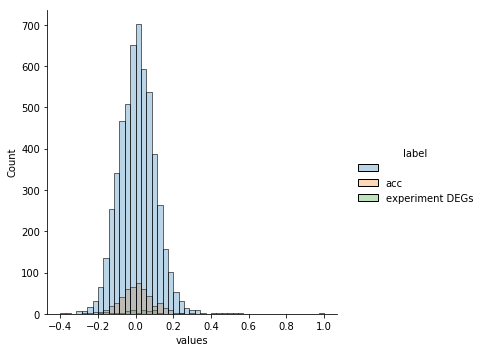

In [26]:
# Plot distribution of correlation scores
fig_pao1 = sns.displot(
    data=lasR_corr,
    x="values",
    hue="label",
    alpha=0.3,
    bins=np.linspace(-0.4, 1.0, 50),
)

In [27]:
# Let's try looking at genes within the same module as lasR
cluster_method = "affinity"
gene_subset = "all"
pa14_membership_filename = os.path.join(
    paths.LOCAL_DATA_DIR, f"pa14_modules_{cluster_method}_{gene_subset}.tsv"
)

In [28]:
pa14_membership = pd.read_csv(pa14_membership_filename, sep="\t", index_col=0, header=0)

In [29]:
pa14_membership.head()

,module id
PA14_55610,3
PA14_55600,16
PA14_55590,602
PA14_55580,431
PA14_55570,46


In [30]:
lasR_module_id = pa14_membership.loc["PA14_45960"].values[0]
print(lasR_module_id)

348


In [31]:
# Get genes in the same module as lasR
lasR_coexpression_module_genes = pa14_membership[
    pa14_membership["module id"] == lasR_module_id
].index

In [32]:
# Compare gene lists
set(pa14_lasR_genes_Deb.index).intersection(lasR_coexpression_module_genes)

set()

If we look at the distribution of co-expression scores for lasR vs all genes, accessory genes, Deb’s genes, the correlation scores range from (-0.2, 0.2), which is lower compared to other core genes. The lasR accessory (PA14-only) genes are found starting in the top 40 genes.

If we cluster correlation matrix that includes all genes (core and accessory), there are 0 genes that are within the lasR cluster and found in Deb’s genes (highlighted ones only ~80).


### Find all accessory genes co-expressed with least stable core genes

In [33]:
%%time
pao1_least_acc_relationships = gene_relationships.find_related_acc_genes(
    pao1_corr,
    pao1_least_stable_genes,
    pao1_arr,
    10,
    pao1_operon_expression_to_use,
)

CPU times: user 2min 18s, sys: 47.1 ms, total: 2min 18s
Wall time: 2min 18s


In [34]:
pao1_least_acc_relationships.head()

,Related acc genes
gene id,
PA3577,[PA1834]
PA2018,No accessory genes
PA1195,No accessory genes
PA3206,No accessory genes
PA0605,No accessory genes


In [35]:
%%time
pa14_least_acc_relationships = gene_relationships.find_related_acc_genes(
    pa14_corr,
    pa14_least_stable_genes,
    pa14_arr,
    10,
    pa14_operon_expression_to_use,
)

CPU times: user 2min 27s, sys: 0 ns, total: 2min 27s
Wall time: 2min 27s


In [36]:
pa14_least_acc_relationships.head()

,Related acc genes
gene id,
PA14_00600,No accessory genes
PA14_01600,"[PA14_30950, PA14_44230, PA14_30870]"
PA14_01910,No accessory genes
PA14_01980,No accessory genes
PA14_02300,No accessory genes


### Add accessory gene list to core-core annotation df

In [37]:
# Load current core-core annotations
pao1_core_stable_similarity_filename = "pao1_core_stable_associations.tsv"
pa14_core_stable_similarity_filename = "pa14_core_stable_associations.tsv"

In [38]:
pao1_all_associations = pd.read_csv(
    pao1_core_stable_similarity_filename, sep="\t", header=0, index_col=0
)
pa14_all_associations = pd.read_csv(
    pa14_core_stable_similarity_filename, sep="\t", header=0, index_col=0
)

In [39]:
print(pao1_all_associations.shape)
print(pa14_all_associations.shape)

(682, 6)
(682, 6)


In [40]:
# Merge KEGG associations with transcriptional similarity information
pao1_all_associations = pao1_all_associations.merge(
    pao1_least_acc_relationships, left_index=True, right_index=True, how="left"
)
pa14_all_associations = pa14_all_associations.merge(
    pa14_least_acc_relationships, left_index=True, right_index=True, how="left"
)

In [41]:
# Check that the dimension is consistent before and after merge
print(pao1_all_associations.shape)
print(pa14_all_associations.shape)

(682, 7)
(682, 7)


In [42]:
pao1_all_associations.head()

,pathways present,PA14 homolog id,Transcriptional similarity across strains,P-value,Name,label,Related acc genes
gene id,,,,,,,
PA0355,[],PA14_04650,0.508206,0.0,pfpI,most stable,NaN
PA3655,[],PA14_17070,0.579558,0.0,tsf,most stable,NaN
PA0620,[],PA14_08050,0.545196,0.0,NaN,most stable,NaN
PA0956,['KEGG-Pathway-pae00970: Aminoacyl-tRNA biosyn...,PA14_51900,0.581097,0.0,proS,most stable,NaN
PA3834,['KEGG-Pathway-pae00970: Aminoacyl-tRNA biosyn...,PA14_14440,0.505727,0.0,valS,most stable,NaN


In [43]:
# Reorder columns
pao1_all_associations = pao1_all_associations[
    [
        "Name",
        "PA14 homolog id",
        "pathways present",
        "Transcriptional similarity across strains",
        "P-value",
        "label",
        "Related acc genes",
    ]
]

pa14_all_associations = pa14_all_associations[
    [
        "Name",
        "PAO1 homolog id",
        "pathways present",
        "Transcriptional similarity across strains",
        "P-value",
        "label",
        "Related acc genes",
    ]
]

In [44]:
pao1_all_associations.sort_values(by="label").head()

,Name,PA14 homolog id,pathways present,Transcriptional similarity across strains,P-value,label,Related acc genes
gene id,,,,,,,
PA2497,NaN,PA14_32360,[],0.198383,1.316381e-48,least stable,No accessory genes
PA4715,NaN,PA14_62400,[],0.194614,8.255725e-47,least stable,No accessory genes
PA1537,NaN,PA14_44570,[],0.192893,5.308744e-46,least stable,No accessory genes
PA1637,kdpE,PA14_43340,[],0.168603,2.107644e-35,least stable,No accessory genes
PA0669,NaN,PA14_55610,[],0.137983,3.753804e-24,least stable,No accessory genes


In [45]:
pa14_all_associations.sort_values(by="label").head()

,Name,PAO1 homolog id,pathways present,Transcriptional similarity across strains,P-value,label,Related acc genes
PA14_35690,pslE,PA2235,[],0.175337,3.277333e-38,least stable,"[PA14_31070, PA14_10120, PA14_33970, PA14_20520]"
PA14_48770,NaN,PA1201,[],0.182194,3.602779e-41,least stable,No accessory genes
PA14_11670,mucE,PA4033,[],0.179098,8.084179e-40,least stable,[PA14_58980]
PA14_60070,NaN,PA1939,[],0.192158,1.104447e-45,least stable,"[PA14_60120, PA14_60110, PA14_59780, PA14_5917..."
PA14_59960,NaN,PA0982,[],0.135936,1.706603e-23,least stable,"[PA14_59350, PA14_59830, PA14_59060, PA14_6002..."


In [46]:
# Save
pao1_all_associations.to_csv("pao1_core_stable_associations_final.tsv", sep="\t")
pa14_all_associations.to_csv("pa14_core_stable_associations_final.tsv", sep="\t")

Based on the results, there are some accessory genes that are shared by 4-5 core genes, most of these are uncharacterized by uniprot: one is integrase catalytic domain, GGDEF domain proteins.

What threshold makes sense for looking at the top # co-expressed accessory genes?
